In [1]:
from keras.applications import VGG16
from keras.layers import Dense, Dropout, Activation, Flatten
from keras import models, optimizers, layers
from keras.preprocessing.image import array_to_img, img_to_array, load_img, ImageDataGenerator
from keras.applications.resnet50 import preprocess_input
from sklearn.svm import OneClassSVM

import glob  
from PIL import Image 
import numpy as np  
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn import preprocessing

Using TensorFlow backend.


In [2]:
def expand2square(pil_img, background_color):
    width, height = pil_img.size
    if width == height:
        return pil_img
    elif width > height:
        result = Image.new(pil_img.mode, (width, width), background_color)
        result.paste(pil_img, (0, (width - height) // 2))
        return result
    else:
        result = Image.new(pil_img.mode, (height, height), background_color)
        result.paste(pil_img, ((height - width) // 2, 0))
        return result

In [3]:
model = VGG16(weights='imagenet', include_top=False, pooling="avg")

Instructions for updating:
Colocations handled automatically by placer.
58892288/58889256 [==============================] - 17s 0us/step


In [4]:
def feature_extraction(model, img_path, image_size=224):
    im=load_img(f)
    img = expand2square(im, (128, 128, 128)).resize((image_size, image_size))
    x = img_to_array(img)
    x = np.expand_dims(x, axis=0)  # add a dimention of samples
    x = preprocess_input(x)  # RGB 2 BGR and zero-centering by mean pixel based on the position of channels

    feat = model.predict(x)  # Get image features
    feat = feat.flatten()  # Convert 3-dimentional matrix to (1, n) array

    return feat

In [7]:
data=[]
files = glob.glob("./ipynbs/data/guitar/*")    
for f in files:
        print(f)
        ret= feature_extraction(model, f, 224)
        data.append(ret)
        #plt.plot(ret)
        #plt.show()

./ipynbs/data/guitar\1.yamaha_cs40jgg_la.jpg
./ipynbs/data/guitar\10.10029309-1.jpg
./ipynbs/data/guitar\11.2_000000042808.jpg
./ipynbs/data/guitar\15.jlrs1.jpg
./ipynbs/data/guitar\18.mono24777839-180718-02.jpg
./ipynbs/data/guitar\19.4957812472272M.jpg
./ipynbs/data/guitar\2.41jNzTRrMcL.jpg
./ipynbs/data/guitar\22.51tiG8DdcwL.jpg
./ipynbs/data/guitar\23.structure_p01_01.jpg
./ipynbs/data/guitar\24.20190929-img_0202.jpg
./ipynbs/data/guitar\26.accord-2119_1920-300x200.jpg
./ipynbs/data/guitar\28.play_main.jpg
./ipynbs/data/guitar\29.112739.jpg
./ipynbs/data/guitar\3.61AeXyD9fcL._SY355_.jpg
./ipynbs/data/guitar\30.132252325.jpg
./ipynbs/data/guitar\33.D1tMz8wg_400x400.jpeg
./ipynbs/data/guitar\35.classical-guitar.jpg
./ipynbs/data/guitar\36.i758393987559121.jpg
./ipynbs/data/guitar\37.2500000855948_2.jpg
./ipynbs/data/guitar\40.600L-53.jpg
./ipynbs/data/guitar\45.350ad7f9b42387589fdd2b78a0bfedee10273634.jpg
./ipynbs/data/guitar\46.419L0n9bPhL.jpg
./ipynbs/data/guitar\48.20180425-img_04

./ipynbs/data/guitar\extened-22_0_5480.jpg
./ipynbs/data/guitar\extened-22_0_8113.jpg
./ipynbs/data/guitar\extened-22_0_8187.jpg
./ipynbs/data/guitar\extened-22_0_8942.jpg
./ipynbs/data/guitar\extened-22_0_9738.jpg
./ipynbs/data/guitar\extened-22_0_98.jpg
./ipynbs/data/guitar\extened-23_0_2420.jpg
./ipynbs/data/guitar\extened-23_0_307.jpg
./ipynbs/data/guitar\extened-23_0_3443.jpg
./ipynbs/data/guitar\extened-23_0_4120.jpg
./ipynbs/data/guitar\extened-23_0_440.jpg
./ipynbs/data/guitar\extened-23_0_4405.jpg
./ipynbs/data/guitar\extened-23_0_4522.jpg
./ipynbs/data/guitar\extened-23_0_6897.jpg
./ipynbs/data/guitar\extened-23_0_7226.jpg
./ipynbs/data/guitar\extened-23_0_7340.jpg
./ipynbs/data/guitar\extened-24_0_1010.jpg
./ipynbs/data/guitar\extened-24_0_1069.jpg
./ipynbs/data/guitar\extened-24_0_3121.jpg
./ipynbs/data/guitar\extened-24_0_337.jpg
./ipynbs/data/guitar\extened-24_0_3582.jpg
./ipynbs/data/guitar\extened-24_0_4117.jpg
./ipynbs/data/guitar\extened-24_0_5483.jpg
./ipynbs/data/gu

./ipynbs/data/guitar\extened-3_0_5984.jpg
./ipynbs/data/guitar\extened-3_0_6493.jpg
./ipynbs/data/guitar\extened-3_0_6547.jpg
./ipynbs/data/guitar\extened-3_0_6689.jpg
./ipynbs/data/guitar\extened-40_0_1166.jpg
./ipynbs/data/guitar\extened-40_0_1965.jpg
./ipynbs/data/guitar\extened-40_0_3522.jpg
./ipynbs/data/guitar\extened-40_0_3777.jpg
./ipynbs/data/guitar\extened-40_0_5872.jpg
./ipynbs/data/guitar\extened-40_0_5973.jpg
./ipynbs/data/guitar\extened-40_0_7140.jpg
./ipynbs/data/guitar\extened-40_0_8.jpg
./ipynbs/data/guitar\extened-40_0_8395.jpg
./ipynbs/data/guitar\extened-40_0_9014.jpg
./ipynbs/data/guitar\extened-41_0_1466.jpg
./ipynbs/data/guitar\extened-41_0_1605.jpg
./ipynbs/data/guitar\extened-41_0_2004.jpg
./ipynbs/data/guitar\extened-41_0_2712.jpg
./ipynbs/data/guitar\extened-41_0_2796.jpg
./ipynbs/data/guitar\extened-41_0_5303.jpg
./ipynbs/data/guitar\extened-41_0_7798.jpg
./ipynbs/data/guitar\extened-41_0_8128.jpg
./ipynbs/data/guitar\extened-41_0_8893.jpg
./ipynbs/data/guit

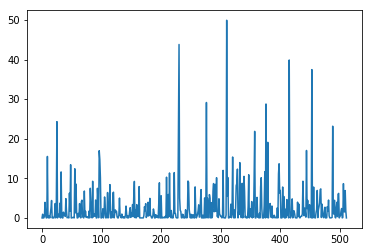

In [19]:
plt.plot(data[20])
plt.show()

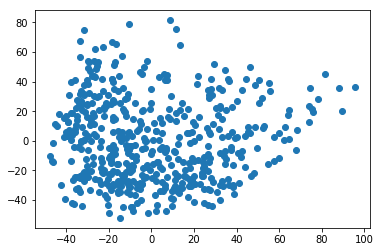

In [8]:
data = np.array(data)
pca = PCA(n_components=2)
pdata =np.array(pca.fit_transform(data))
plt.scatter(pdata.T[0],pdata.T[1])
plt.show()

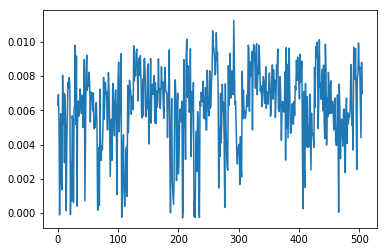

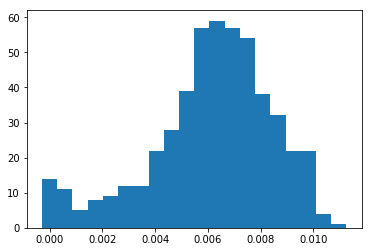

In [17]:
mmscaler = preprocessing.MinMaxScaler() 
mmscaler.fit(data)  
sdata=mmscaler.transform(data)

ocsvm = OneClassSVM(nu=0.001, kernel="rbf", gamma='auto')
ocsvm.fit(sdata)
y_pred = ocsvm.decision_function(sdata).ravel()
plt.plot(y_pred)
plt.show()
#df = ocsvm.decision_function(np.array([X.ravel(), Y.ravel()]).T).reshape(X.shape)
preds = ocsvm.predict(sdata)
plt.hist(y_pred,bins=20)
plt.show()

In [10]:
preds

array([ 1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1

In [11]:
adata=[]
files = glob.glob("./ipynbs/data/others/*")    
for f in files:
        print(f)
        ret= feature_extraction(model, f, 224)
        adata.append(ret)
adata = np.array(adata)
sadata=mmscaler.transform(adata)
apred=ocsvm.predict(sadata)

./ipynbs/data/others\065-00496_m.jpg
./ipynbs/data/others\2016-06-14_Orange_and_white_tabby_cat_born_in_2016_茶トラ白ねこ_DSCF6526☆彡.jpg
./ipynbs/data/others\31OFo14if6L._AC_SS350_.jpg
./ipynbs/data/others\514N0S1vXRL._SY550_.jpg
./ipynbs/data/others\61xdYKcuO0L._SY355_.jpg
./ipynbs/data/others\BAAD5109720944D6B071FDE3916D87B6_12073.jpg
./ipynbs/data/others\classic_guitar.png
./ipynbs/data/others\piano1_yamaha-cfx-bk2.jpg


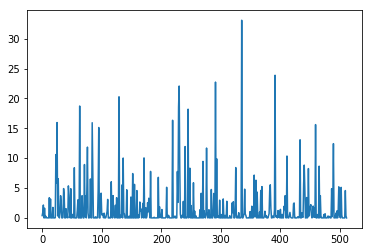

In [22]:
plt.plot(adata[0])
plt.show()

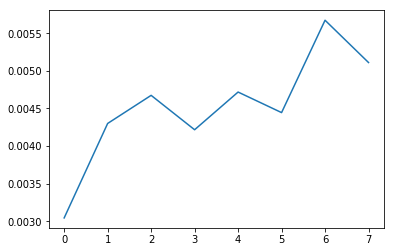

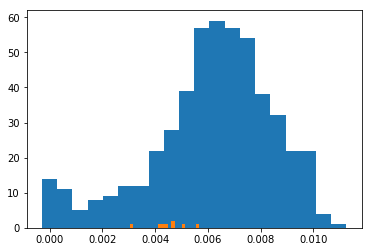

In [24]:
a_pca_data =np.array(pca.fit_transform(adata))
y_pred_other = ocsvm.decision_function(adata/100).ravel()
plt.plot(y_pred_other)
plt.show()
plt.hist(y_pred,bins=20)
plt.hist(y_pred_other,bins=20)
plt.show()

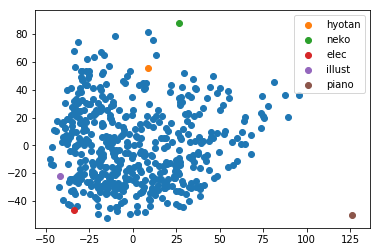

In [28]:
plt.scatter(pdata.T[0],pdata.T[1])
plt.scatter(a_pca_data.T[0][0],a_pca_data.T[1][0],label="hyotan")
plt.scatter(a_pca_data.T[0][1],a_pca_data.T[1][1],label="neko")
plt.scatter(a_pca_data.T[0][4],a_pca_data.T[1][4],label="elec")
plt.scatter(a_pca_data.T[0][6],a_pca_data.T[1][6],label="illust")
plt.scatter(a_pca_data.T[0][7],a_pca_data.T[1][7],label="piano")
plt.legend()
plt.show()